# **UAS Big Data Lanjut**

**ANGGOTA KELOMPOK:**

**1. Kenedi Fagus Pradana (21.11.4338)**

**2. Taufiq Dwi Aziz (21.11.4342)**

**3. Zulaicho Oktafreza Wardhana (21.11.4360)**

**4. Ahmed Ibnu Aprianto (21.11.4361)**

**5. Yahya Handarestanto (21.11.4365)**

**6. Khoirudin Yoga Pratama (21.11.4389)**


 [Link dataseet kaggle](https://https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download)

In [ ]:
!pip install pyspark
!pip install findspark
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=54a53e5d6acee932710cf2028dbbcaf0c099800d0c43d72b0b7c692ce6409ee4
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import StructType, StructField, IntegerType, DoubleType
from pyspark.sql.functions import col, isnan, when, count
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

from pyspark.ml.feature import StandardScaler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from pyspark.ml.feature import StandardScaler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator


In [ ]:
spark = SparkSession.builder.getOrCreate()
spark = SparkSession.builder\
        .master("local")\
        .appName("RDD")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

spark
sc = spark.sparkContext

In [ ]:
df = spark.read.csv("/content/diabetes.csv", header=True, inferSchema=True)
df.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [ ]:
# Create a Spark session
spark = SparkSession.builder.appName("NullValuesExample").getOrCreate()

# Read CSV file into a DataFrame
df = spark.read.csv("/content/diabetes.csv", header=True, inferSchema=True)

# Display null values for each column
for col_name in df.columns:
    null_count = df.filter(col(col_name).isNull()).count()
    print(f"Column '{col_name}' has {null_count} null values.")

# Stop the Spark session
spark.stop()


Column 'Pregnancies' has 0 null values.
Column 'Glucose' has 0 null values.
Column 'BloodPressure' has 0 null values.
Column 'SkinThickness' has 0 null values.
Column 'Insulin' has 0 null values.
Column 'BMI' has 0 null values.
Column 'DiabetesPedigreeFunction' has 0 null values.
Column 'Age' has 0 null values.
Column 'Outcome' has 0 null values.


In [ ]:
# Inisialisasi Spark session
spark = SparkSession.builder.appName("DiabetesPreprocessing").getOrCreate()

# Definisi skema data
schema = StructType([
    StructField("Pregnancies", IntegerType(), True),
    StructField("Glucose", IntegerType(), True),
    StructField("BloodPressure", IntegerType(), True),
    StructField("SkinThickness", IntegerType(), True),
    StructField("Insulin", IntegerType(), True),
    StructField("BMI", DoubleType(), True),
    StructField("DiabetesPedigreeFunction", DoubleType(), True),
    StructField("Age", IntegerType(), True),
    StructField("Outcome", IntegerType(), True)
])

# Membaca data dari file CSV ke dataframe
data = spark.read.csv("/content/diabetes.csv", header=True, schema=schema)

# Menampilkan skema dataframe dan tipe data masing-masing kolom
data.printSchema()

# Menampilkan beberapa baris pertama data
data.show()


root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          

In [ ]:
# Mengganti nama kolom
data = data.withColumnRenamed("Pregnancies", "NumPregnancies") \
           .withColumnRenamed("Glucose", "GlucoseLevel") \
           .withColumnRenamed("BloodPressure", "BloodPressure") \
           .withColumnRenamed("SkinThickness", "SkinThickness") \
           .withColumnRenamed("Insulin", "InsulinLevel") \
           .withColumnRenamed("BMI", "BodyMassIndex") \
           .withColumnRenamed("DiabetesPedigreeFunction", "PedigreeFunction") \
           .withColumnRenamed("Age", "AgeInYears") \
           .withColumnRenamed("Outcome", "DiabetesOutcome")

# Menampilkan skema dataframe setelah perubahan nama kolom
data.printSchema()

# Menampilkan beberapa baris pertama data
data.show()

root
 |-- NumPregnancies: integer (nullable = true)
 |-- GlucoseLevel: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- InsulinLevel: integer (nullable = true)
 |-- BodyMassIndex: double (nullable = true)
 |-- PedigreeFunction: double (nullable = true)
 |-- AgeInYears: integer (nullable = true)
 |-- DiabetesOutcome: integer (nullable = true)

+--------------+------------+-------------+-------------+------------+-------------+----------------+----------+---------------+
|NumPregnancies|GlucoseLevel|BloodPressure|SkinThickness|InsulinLevel|BodyMassIndex|PedigreeFunction|AgeInYears|DiabetesOutcome|
+--------------+------------+-------------+-------------+------------+-------------+----------------+----------+---------------+
|             6|         148|           72|           35|           0|         33.6|           0.627|        50|              1|
|             1|          85|           66|           29|        

In [ ]:
# Memeriksa nilai null di setiap kolom
null_counts = data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns])

# Menampilkan jumlah nilai null di setiap kolom
null_counts.show()

+--------------+------------+-------------+-------------+------------+-------------+----------------+----------+---------------+
|NumPregnancies|GlucoseLevel|BloodPressure|SkinThickness|InsulinLevel|BodyMassIndex|PedigreeFunction|AgeInYears|DiabetesOutcome|
+--------------+------------+-------------+-------------+------------+-------------+----------------+----------+---------------+
|             0|           0|            0|            0|           0|            0|               0|         0|              0|
+--------------+------------+-------------+-------------+------------+-------------+----------------+----------+---------------+



In [ ]:
# Mengubah tipe data kolom-kolom tertentu
data = data.withColumn("GlucoseLevel", col("GlucoseLevel").cast("double"))
data = data.withColumn("BloodPressure", col("BloodPressure").cast("double"))
data = data.withColumn("SkinThickness", col("SkinThickness").cast("double"))
data = data.withColumn("InsulinLevel", col("InsulinLevel").cast("double"))
data = data.withColumn("AgeInYears", col("AgeInYears").cast("double"))

# Menampilkan skema dataframe setelah perubahan tipe data
data.printSchema()

# Menampilkan beberapa baris pertama data
data.show()

root
 |-- NumPregnancies: integer (nullable = true)
 |-- GlucoseLevel: double (nullable = true)
 |-- BloodPressure: double (nullable = true)
 |-- SkinThickness: double (nullable = true)
 |-- InsulinLevel: double (nullable = true)
 |-- BodyMassIndex: double (nullable = true)
 |-- PedigreeFunction: double (nullable = true)
 |-- AgeInYears: double (nullable = true)
 |-- DiabetesOutcome: integer (nullable = true)

+--------------+------------+-------------+-------------+------------+-------------+----------------+----------+---------------+
|NumPregnancies|GlucoseLevel|BloodPressure|SkinThickness|InsulinLevel|BodyMassIndex|PedigreeFunction|AgeInYears|DiabetesOutcome|
+--------------+------------+-------------+-------------+------------+-------------+----------------+----------+---------------+
|             6|       148.0|         72.0|         35.0|         0.0|         33.6|           0.627|      50.0|              1|
|             1|        85.0|         66.0|         29.0|         0.0|

In [ ]:
# Menampilkan summary statistik
summary = data.describe()

# Menampilkan summary statistik
summary.show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|    NumPregnancies|     GlucoseLevel|     BloodPressure|     SkinThickness|      InsulinLevel|     BodyMassIndex|  PedigreeFunction|        AgeInYears|   DiabetesOutcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|               768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.952217567727642|115.244002351338

In [ ]:
# Menggabungkan kolom-kolom numerik menjadi satu vektor kolom
feature_columns = ["NumPregnancies", "GlucoseLevel", "BloodPressure", "SkinThickness", "InsulinLevel", "BodyMassIndex", "PedigreeFunction", "AgeInYears"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
assembled_data = assembler.transform(data)

# Menghitung matriks korelasi
correlation_matrix = Correlation.corr(assembled_data, "features").head()

# Matriks korelasi dalam format DenseMatrix
corr_matrix = correlation_matrix[0].toArray()

# Menampilkan matriks korelasi
print("Correlation Matrix:")
for i in range(len(feature_columns)):
    row = ""
    for j in range(len(feature_columns)):
        row += f"{feature_columns[j]}: {corr_matrix[i][j]:.2f}\t"
    print(row)

Correlation Matrix:
NumPregnancies: 1.00	GlucoseLevel: 0.13	BloodPressure: 0.14	SkinThickness: -0.08	InsulinLevel: -0.07	BodyMassIndex: 0.02	PedigreeFunction: -0.03	AgeInYears: 0.54	
NumPregnancies: 0.13	GlucoseLevel: 1.00	BloodPressure: 0.15	SkinThickness: 0.06	InsulinLevel: 0.33	BodyMassIndex: 0.22	PedigreeFunction: 0.14	AgeInYears: 0.26	
NumPregnancies: 0.14	GlucoseLevel: 0.15	BloodPressure: 1.00	SkinThickness: 0.21	InsulinLevel: 0.09	BodyMassIndex: 0.28	PedigreeFunction: 0.04	AgeInYears: 0.24	
NumPregnancies: -0.08	GlucoseLevel: 0.06	BloodPressure: 0.21	SkinThickness: 1.00	InsulinLevel: 0.44	BodyMassIndex: 0.39	PedigreeFunction: 0.18	AgeInYears: -0.11	
NumPregnancies: -0.07	GlucoseLevel: 0.33	BloodPressure: 0.09	SkinThickness: 0.44	InsulinLevel: 1.00	BodyMassIndex: 0.20	PedigreeFunction: 0.19	AgeInYears: -0.04	
NumPregnancies: 0.02	GlucoseLevel: 0.22	BloodPressure: 0.28	SkinThickness: 0.39	InsulinLevel: 0.20	BodyMassIndex: 1.00	PedigreeFunction: 0.14	AgeInYears: 0.04	
NumPregnancie

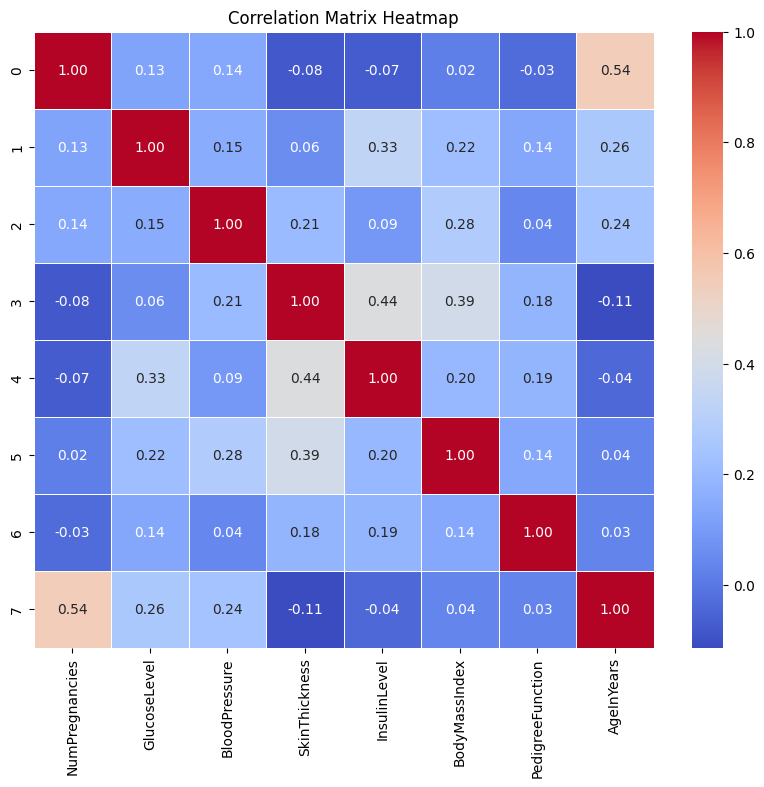

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = Correlation.corr(assembled_data, "features").head()

# Matriks korelasi dalam format DenseMatrix
corr_matrix = correlation_matrix[0].toArray()

# Membuat DataFrame dari matriks korelasi
corr_df = spark.createDataFrame(corr_matrix.tolist(), feature_columns)

# Mengumpulkan hasil korelasi ke dalam bentuk Pandas DataFrame
corr_pandas = corr_df.toPandas()

# Membuat heatmap menggunakan Seaborn dan Matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pandas, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


### NAIVE BAYES

In [ ]:
# Split data menjadi training set dan test set
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Inisialisasi algoritma Naive Bayes
naive_bayes = NaiveBayes(featuresCol="features", labelCol="DiabetesOutcome", smoothing=1.0)


In [ ]:
# Membuat pipeline dengan algoritma Naive Bayes
pipeline = Pipeline(stages=[naive_bayes])

# Membuat grid parameter untuk fine-tuning
param_grid = ParamGridBuilder().build()

In [ ]:
# Inisialisasi evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="DiabetesOutcome", metricName="accuracy")

# Inisialisasi CrossValidator
cross_validator = CrossValidator(estimator=pipeline,
                                 estimatorParamMaps=param_grid,
                                 evaluator=evaluator,
                                 numFolds=5,  # Jumlah lipatan dalam cross-validation
                                 seed=42)

In [ ]:
# Melatih model menggunakan training set
model = cross_validator.fit(train_data)

# Menguji model menggunakan test set
predictions = model.transform(test_data)


In [ ]:
# Evaluasi performa model
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.2%}")

# Menampilkan hasil prediksi
predictions.select("DiabetesOutcome", "prediction", "probability").show(truncate=False)

Accuracy: 60.16%
+---------------+----------+-------------------------------------------+
|DiabetesOutcome|prediction|probability                                |
+---------------+----------+-------------------------------------------+
|0              |0.0       |[0.51827469916957,0.4817253008304301]      |
|0              |1.0       |[0.43561144026410475,0.5643885597358953]   |
|0              |1.0       |[2.7633772048569143E-7,0.9999997236622795] |
|0              |1.0       |[0.13847897905461462,0.8615210209453853]   |
|0              |0.0       |[0.9428413617654954,0.0571586382345046]    |
|0              |0.0       |[0.9999480956399942,5.190436000568964E-5]  |
|0              |0.0       |[0.9999980017175426,1.998282457366377E-6]  |
|0              |1.0       |[0.004307799321460203,0.9956922006785397]  |
|0              |0.0       |[0.999968974603539,3.102539646116633E-5]   |
|1              |0.0       |[0.9999959055157327,4.094484267255276E-6]  |
|0              |0.0       |[0.999

In [ ]:
# Initialize BinaryClassificationEvaluator for AUC
auc_evaluator = BinaryClassificationEvaluator(labelCol="DiabetesOutcome", metricName="areaUnderROC")

# Evaluate AUC
auc = auc_evaluator.evaluate(predictions)
print(f"AUC: {auc:.2%}")

AUC: 29.42%


In [ ]:
# Initialize MulticlassClassificationEvaluator for F1 Score, Precision, and Recall
f1_evaluator = MulticlassClassificationEvaluator(labelCol="DiabetesOutcome", metricName="f1")
precision_evaluator = MulticlassClassificationEvaluator(labelCol="DiabetesOutcome", metricName="weightedPrecision")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="DiabetesOutcome", metricName="weightedRecall")


In [ ]:
# Evaluate F1 Score, Precision, and Recall
f1 = f1_evaluator.evaluate(predictions)
precision = precision_evaluator.evaluate(predictions)
recall = recall_evaluator.evaluate(predictions)

print(f"F1 Score: {f1:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")

F1 Score: 60.27%
Precision: 60.38%
Recall: 60.16%


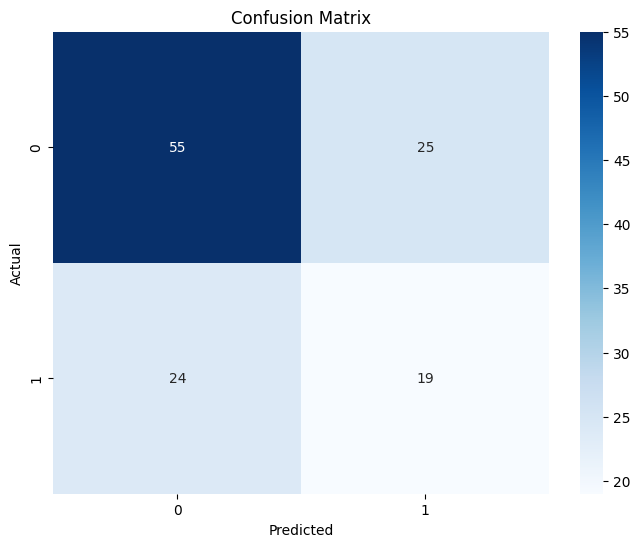

In [ ]:
# Menampilkan confusion matrix menggunakan heatmap
y_true = predictions.select("DiabetesOutcome").collect()
y_pred = predictions.select("prediction").collect()
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# y_true = predictions.select("Outcome").collect()
# y_pred = predictions.select("prediction").collect()
# conf_matrix = confusion_matrix(y_true, y_pred)
# plt.figure(figsize=(16, 5))
# plt.subplot(1, 2, 1)
# plt.title("Confusion Matrix")
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])

In [ ]:
# Assuming y_true is the true labels from the test set
y_true = test_data.select("DiabetesOutcome").rdd.map(lambda row: row[0]).collect()

In [ ]:
from sklearn.metrics import roc_curve, auc as sk_auc
# Assuming predictions is a DataFrame containing prediction probabilities
fpr, tpr, _ = roc_curve(y_true, predictions.select("probability").rdd.map(lambda row: row[0][1]).collect())
roc_auc = sk_auc(fpr, tpr)  # Use the alias sk_auc for the auc function
plt.figure(figsize=(8, 4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

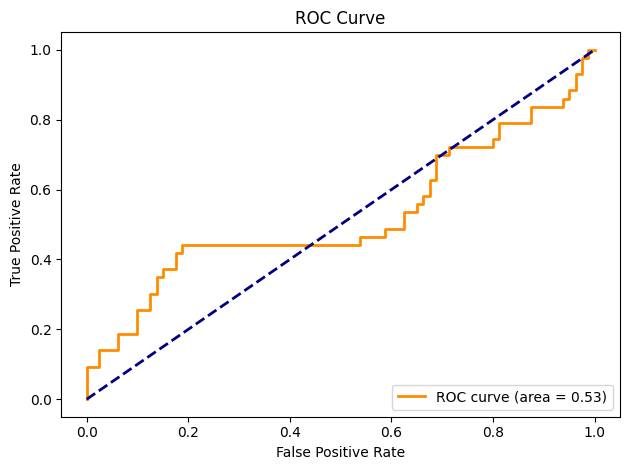

In [ ]:
# Plot ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
# import pandas as pd
# # Menampilkan matriks korelasi
# correlation_matrix = df.select(feature_columns).toPandas().corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# plt.title("Correlation Matrix Heatmap")
# plt.show()

## RANDOM FORREST

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [ ]:
# Inisialisasi Spark session
spark = SparkSession.builder.appName("RandomForestClassification").getOrCreate()
# # Membaca data dari file CSV ke dalam DataFrame
data = spark.read.csv("/content/diabetes.csv", header=True, inferSchema=True)

In [ ]:
# Inisialisasi Spark session
spark = SparkSession.builder.appName("RandomForestClassification").getOrCreate()
# # Membaca data dari file CSV ke dalam DataFrame
data = spark.read.csv("/content/diabetes.csv", header=True, inferSchema=True)

In [ ]:
# Mengubah tipe data kolom label ke integer
assembled_data = assembled_data.withColumn("Outcome", col("Outcome").cast("integer"))

In [ ]:
# Split data menjadi training set dan test set
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# # Inisialisasi Spark session
# spark = SparkSession.builder.appName("RandomForestClassification").getOrCreate()

# # Membaca data dari file CSV ke dalam DataFrame
# df = spark.read.csv("/content/diabetes.csv", header=True, inferSchema=True)

# # Menggabungkan kolom-kolom numerik menjadi satu vektor kolom
# feature_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
# assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
# assembled_data = assembler.transform(df)

# # Mengubah tipe data kolom label ke integer
# assembled_data = assembled_data.withColumn("Outcome", col("Outcome").cast("integer"))

# # Split data menjadi training set dan test set
# train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

# # Inisialisasi algoritma Random Forest
# rf_classifier = RandomForestClassifier(featuresCol="features", labelCol="Outcome", numTrees=100, maxDepth=5)

# # Membuat pipeline dengan algoritma Random Forest
# pipeline = Pipeline(stages=[rf_classifier])

# # Melatih model menggunakan training set
# model = pipeline.fit(train_data)

# # Menguji model menggunakan test set
# predictions = model.transform(test_data)

# # Evaluasi performa model
# evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", metricName="accuracy")
# accuracy = evaluator.evaluate(predictions)
# print(f"Accuracy: {accuracy:.2%}")

# # Menampilkan hasil prediksi
# predictions.select("Outcome", "prediction", "probability").show(truncate=False)

In [ ]:
# Inisialisasi algoritma Random Forest
rf_classifier = RandomForestClassifier(featuresCol="features", labelCol="Outcome", numTrees=100, maxDepth=5)

# Membuat pipeline dengan algoritma Random Forest
pipeline = Pipeline(stages=[rf_classifier])

# Melatih model menggunakan training set
model = pipeline.fit(train_data)

# Menguji model menggunakan test set
predictions = model.transform(test_data)

In [ ]:
# Evaluasi performa model
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.2%}")

# Menampilkan hasil prediksi
predictions.select("Outcome", "prediction", "probability").show(truncate=False)

Accuracy: 78.86%
+-------+----------+-----------------------------------------+
|Outcome|prediction|probability                              |
+-------+----------+-----------------------------------------+
|0      |0.0       |[0.9437198762283489,0.056280123771651196]|
|0      |0.0       |[0.8367025635014778,0.1632974364985222]  |
|0      |0.0       |[0.8117043637071486,0.18829563629285131] |
|0      |0.0       |[0.9441424114396165,0.055857588560383586]|
|0      |0.0       |[0.9366331762107343,0.0633668237892657]  |
|0      |0.0       |[0.9437253104822042,0.05627468951779581] |
|0      |0.0       |[0.9443718788988972,0.05562812110110284] |
|0      |0.0       |[0.8407605335767363,0.15923946642326373] |
|0      |0.0       |[0.8528094896394055,0.14719051036059444] |
|1      |0.0       |[0.8384814003250205,0.16151859967497958] |
|0      |0.0       |[0.7742911304795866,0.22570886952041327] |
|0      |1.0       |[0.45595858659797583,0.544041413402024]  |
|0      |0.0       |[0.738156874654938

In [ ]:
# Menghitung metrik evaluasi menggunakan scikit-learn
y_true = predictions.select("Outcome").collect()
y_pred = predictions.select("prediction").collect()

# Akurasi
accuracy = accuracy_score(y_true, y_pred)
print(f"Akurasi: {accuracy:.2%}")

# F1 Score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2%}")

# Presisi
precision = precision_score(y_true, y_pred)
print(f"Presisi: {precision:.2%}")

# Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2%}")


Akurasi: 78.86%
F1 Score: 65.79%
Presisi: 75.76%
Recall: 58.14%


In [ ]:
# # Menampilkan tree model
# tree_model = model.stages[-1]
# print("Decision Tree Model:")
# print(tree_model.toDebugString)

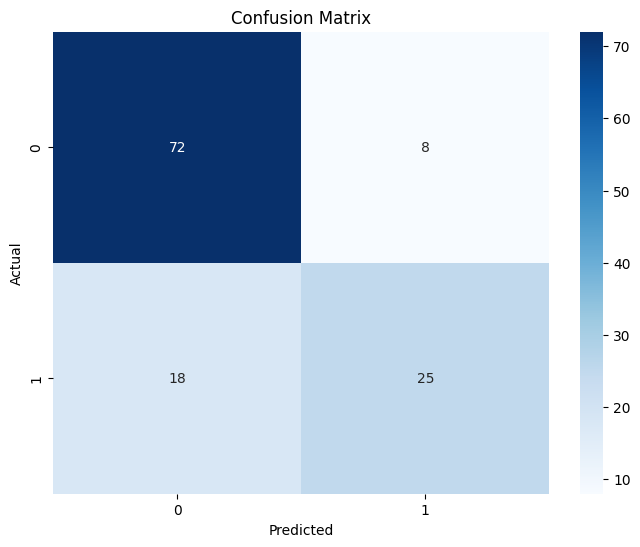

In [ ]:
# Menampilkan confusion matrix menggunakan heatmap
y_true = predictions.select("Outcome").collect()
y_pred = predictions.select("prediction").collect()
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## DECISION TREE

In [ ]:
# Split data menjadi training set dan test set
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Inisialisasi algoritma Decision Tree
dt_classifier = DecisionTreeClassifier(featuresCol="features", labelCol="Outcome", maxDepth=5)


In [ ]:
# Membuat pipeline dengan algoritma Decision Tree
pipeline = Pipeline(stages=[dt_classifier])

In [ ]:
# Melatih model menggunakan training set
model = pipeline.fit(train_data)

In [ ]:
# Menguji model menggunakan test set
predictions = model.transform(test_data)

In [ ]:
# Evaluasi performa model
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.2%}")

# Menampilkan hasil prediksi
predictions.select("Outcome", "prediction", "probability").show(truncate=False)

Accuracy: 77.24%
+-------+----------+-----------------------------------------+
|Outcome|prediction|probability                              |
+-------+----------+-----------------------------------------+
|0      |0.0       |[0.9915966386554622,0.008403361344537815]|
|0      |0.0       |[0.8392857142857143,0.16071428571428573] |
|0      |0.0       |[0.8392857142857143,0.16071428571428573] |
|0      |0.0       |[0.9915966386554622,0.008403361344537815]|
|0      |0.0       |[0.9915966386554622,0.008403361344537815]|
|0      |0.0       |[0.9915966386554622,0.008403361344537815]|
|0      |0.0       |[0.9915966386554622,0.008403361344537815]|
|0      |0.0       |[0.8392857142857143,0.16071428571428573] |
|0      |0.0       |[0.9714285714285714,0.02857142857142857] |
|1      |0.0       |[0.8392857142857143,0.16071428571428573] |
|0      |0.0       |[0.8392857142857143,0.16071428571428573] |
|0      |1.0       |[0.325,0.675]                            |
|0      |0.0       |[0.839285714285714

In [ ]:
# Evaluasi menggunakan BinaryClassificationEvaluator untuk AUC
binary_evaluator = BinaryClassificationEvaluator(labelCol="Outcome")
auc = binary_evaluator.evaluate(predictions, {binary_evaluator.metricName: "areaUnderROC"})
print(f"AUC: {auc:.2%}")

# Menghitung metrik evaluasi menggunakan scikit-learn
y_true = predictions.select("Outcome").collect()
y_pred = predictions.select("prediction").collect()

# Akurasi
accuracy = accuracy_score(y_true, y_pred)
print(f"Akurasi: {accuracy:.2%}")

# F1 Score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2%}")

# Presisi
precision = precision_score(y_true, y_pred)
print(f"Presisi: {precision:.2%}")

# Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2%}")

AUC: 74.71%
Akurasi: 77.24%
F1 Score: 64.10%
Presisi: 71.43%
Recall: 58.14%


In [ ]:
from pyspark.ml.classification import DecisionTreeClassificationModel, DecisionTreeClassifier
# Menampilkan tree model
tree_model = model.stages[-1]
if isinstance(tree_model, DecisionTreeClassificationModel):
    print("Decision Tree Model:")
    print(tree_model.toDebugString)

Decision Tree Model:
DecisionTreeClassificationModel: uid=DecisionTreeClassifier_55147ded2c89, depth=5, numNodes=35, numClasses=2, numFeatures=8
  If (feature 1 <= 129.5)
   If (feature 7 <= 28.5)
    If (feature 5 <= 30.15)
     If (feature 0 <= 7.5)
      Predict: 0.0
     Else (feature 0 > 7.5)
      Predict: 1.0
    Else (feature 5 > 30.15)
     If (feature 6 <= 1.2229999999999999)
      Predict: 0.0
     Else (feature 6 > 1.2229999999999999)
      Predict: 1.0
   Else (feature 7 > 28.5)
    If (feature 5 <= 26.35)
     If (feature 2 <= 93.0)
      Predict: 0.0
     Else (feature 2 > 93.0)
      Predict: 1.0
    Else (feature 5 > 26.35)
     If (feature 6 <= 0.6214999999999999)
      Predict: 0.0
     Else (feature 6 > 0.6214999999999999)
      Predict: 1.0
  Else (feature 1 > 129.5)
   If (feature 5 <= 29.25)
    If (feature 1 <= 144.5)
     Predict: 0.0
    Else (feature 1 > 144.5)
     If (feature 7 <= 24.5)
      Predict: 0.0
     Else (feature 7 > 24.5)
      If (feature 7 <= 

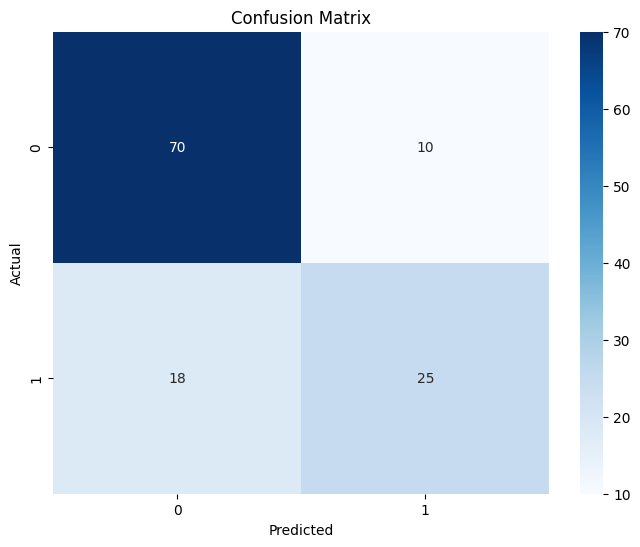

In [ ]:
# Menampilkan confusion matrix menggunakan heatmap
y_true = predictions.select("Outcome").collect()
y_pred = predictions.select("prediction").collect()
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## LOGISTIC REGERESION

In [ ]:
# Split data menjadi training set dan test set
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)


In [ ]:
# Inisialisasi algoritma Logistic Regression
lr_classifier = LogisticRegression(featuresCol="features", labelCol="Outcome", maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Membuat pipeline dengan algoritma Logistic Regression
pipeline = Pipeline(stages=[lr_classifier])

In [ ]:
# Melatih model menggunakan training set
model = pipeline.fit(train_data)

# Menguji model menggunakan test set
predictions = model.transform(test_data)

In [ ]:
# Evaluasi menggunakan BinaryClassificationEvaluator untuk AUC
binary_evaluator = BinaryClassificationEvaluator(labelCol="Outcome")
auc = binary_evaluator.evaluate(predictions, {binary_evaluator.metricName: "areaUnderROC"})
print(f"AUC: {auc:.2%}")

# Evaluasi performa model menggunakan akurasi
evaluator = MulticlassClassificationEvaluator(labelCol="Outcome", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Akurasi: {accuracy:.2%}")

# F1 Score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2%}")

# Presisi
precision = precision_score(y_true, y_pred)
print(f"Presisi: {precision:.2%}")

# Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2%}")

# Menampilkan hasil prediksi
predictions.select("Outcome", "prediction", "probability").show(truncate=False)



AUC: 50.00%
Akurasi: 65.04%
F1 Score: 64.10%
Presisi: 71.43%
Recall: 58.14%
+-------+----------+----------------------------------------+
|Outcome|prediction|probability                             |
+-------+----------+----------------------------------------+
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|1      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232

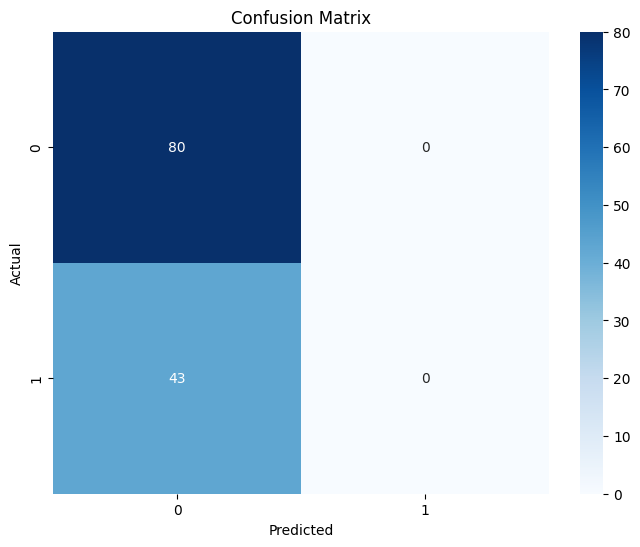

In [ ]:
# Menampilkan confusion matrix menggunakan heatmap
y_true = predictions.select("Outcome").collect()
y_pred = predictions.select("prediction").collect()
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [ ]:
# Menampilkan hasil prediksi
predictions.select("Outcome", "prediction", "probability").show(truncate=False)

+-------+----------+----------------------------------------+
|Outcome|prediction|probability                             |
+-------+----------+----------------------------------------+
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|1      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      |0.0       |[0.6511627906976745,0.34883720930232553]|
|0      

Opsional Min 4 algoritma

## SVM

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

In [ ]:
# Inisialisasi Spark session
spark = SparkSession.builder.appName("SVMClassification").getOrCreate()

# Membaca data dari file CSV ke dalam DataFrame
df = spark.read.csv("/content/diabetes.csv", header=True, inferSchema=True)

In [ ]:
# Menggabungkan kolom-kolom numerik menjadi satu vektor kolom
feature_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
assembled_data = assembler.transform(df)

In [ ]:
# Mengubah tipe data kolom label ke integer
assembled_data = assembled_data.withColumn("Outcome", col("Outcome").cast("integer"))

In [ ]:
# Split data menjadi training set dan test set
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Inisialisasi algoritma SVM
svm_classifier = LinearSVC(featuresCol="features", labelCol="Outcome", maxIter=100, regParam=0.1)
# Membuat pipeline dengan algoritma SVM
pipeline = Pipeline(stages=[svm_classifier])


In [ ]:
# Melatih model menggunakan training set
model = pipeline.fit(train_data)

# Menguji model menggunakan test set
predictions = model.transform(test_data)

In [ ]:
# Evaluasi performa model
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="Outcome", metricName="accuracy")
accuracy = evaluator_accuracy.evaluate(predictions)
print(f"Accuracy: {accuracy:.2%}")

# Evaluasi menggunakan BinaryClassificationEvaluator untuk AUC
binary_evaluator = BinaryClassificationEvaluator(labelCol="Outcome")
auc = binary_evaluator.evaluate(predictions, {binary_evaluator.metricName: "areaUnderROC"})
print(f"AUC: {auc:.2%}")

# Menghitung metrik evaluasi menggunakan scikit-learn
y_true = predictions.select("Outcome").collect()
y_pred = predictions.select("prediction").collect()

# F1 Score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2%}")

# Presisi
precision = precision_score(y_true, y_pred)
print(f"Presisi: {precision:.2%}")

# Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2%}")

# Menampilkan hasil prediksi
predictions.select("Outcome", "prediction").show(truncate=False)

Accuracy: 78.05%
AUC: 86.48%
F1 Score: 64.00%
Presisi: 75.00%
Recall: 55.81%
+-------+----------+
|Outcome|prediction|
+-------+----------+
|0      |0.0       |
|0      |0.0       |
|0      |0.0       |
|0      |0.0       |
|0      |0.0       |
|0      |0.0       |
|0      |0.0       |
|0      |0.0       |
|0      |0.0       |
|1      |0.0       |
|0      |0.0       |
|0      |1.0       |
|0      |0.0       |
|0      |0.0       |
|1      |0.0       |
|0      |0.0       |
|0      |0.0       |
|0      |1.0       |
|0      |0.0       |
|0      |0.0       |
+-------+----------+
only showing top 20 rows

